In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor

In [2]:
dataset = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [3]:
dataset.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
dataset.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
dataset = dataset.drop(['Serial No.'],axis=1)

In [6]:
x = dataset.iloc[:,:7]
y = dataset['Chance of Admit ']

In [11]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 25)

In [12]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [13]:
y_test_predict = rfr.predict(X_test)
mse = mean_squared_error(y_test,y_test_predict)
rmse = np.sqrt(mean_squared_error(y_test,y_test_predict))
r2 = r2_score(y_test,y_test_predict)

print("The model performance for training set is: \n")
print("RMSE is {}".format(rmse))
print("MSE is {}".format(mse))
print("R2 score is {}".format(r2))
print("\n")

The model performance for training set is: 

RMSE is 0.06174150305912543
MSE is 0.0038120131999999952
R2 score is 0.8189295004736319




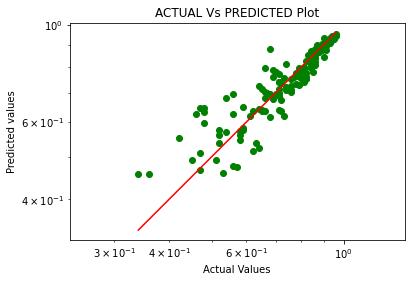

In [16]:
plt.scatter(y_test,y_test_predict,color ='green')
plt.xscale('log')
plt.yscale('log')
point1 = max(max(y_test_predict),max(y_test))
point2 = min(min(y_test_predict),min(y_test))
plt.plot([point1,point2],[point1,point2],'r-')
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.axis('equal')
plt.title("ACTUAL Vs PREDICTED Plot")
plt.show()